<a href="https://colab.research.google.com/github/AtifQureshi110/EDA/blob/main/group_by_order_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Data

In [82]:
import pandas as pd 

In [83]:
url1 = 'https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/order_leads.csv'

In [84]:
order_df = pd.read_csv(url1, parse_dates=[3])
order_df.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [85]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Order Id      100000 non-null  object        
 1   Company Id    100000 non-null  object        
 2   Company Name  100000 non-null  object        
 3   Date          100000 non-null  datetime64[ns]
 4   Order Value   100000 non-null  int64         
 5   Converted     100000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.6+ MB


In [86]:
url2 = 'https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/sales_team.csv'

In [87]:
sale_df=pd.read_csv(url2)
sale_df

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3
...,...,...,...,...
4614,Ida Woodward,LF3CPWWZKSNB1AXI,Unauthorized Increases,654ZMAXSV11BOMMI
4615,Ida Woodward,LF3CPWWZKSNB1AXI,Atom-Like Principle,42AO6UOXN0GXVHFQ
4616,Ida Woodward,LF3CPWWZKSNB1AXI,Congratulatory Economist,4B714VS0FWLGBSMU
4617,Ida Woodward,LF3CPWWZKSNB1AXI,Readable Pilots,G4D892KB5W0UCPR4


In [88]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sales Rep     4619 non-null   object
 1   Sales Rep Id  4619 non-null   object
 2   Company Name  4619 non-null   object
 3   Company Id    4619 non-null   object
dtypes: object(4)
memory usage: 144.5+ KB


# Merging

Pandas' groupby is undoubtly one of the most powerful functionalities that Pandas brings to the table. However, most users only utilize a fraction of the capabilities of groupby.

Groupby allows to adopt a split-apply-combine approach to your data set. This is comparable to slicing and dicing your data such that it serves your specific need.

On a high level this means:

split the data based on column(s)/condition(s) into groups
apply a function/transformation to all the groups and combine the results into an output

In [89]:
#order_df has lager data and sales is small dataset.

In [90]:
# company id, company name are comman columns in both dataset so we merge them.
df = pd.merge(order_df, sale_df,on=["Company Id",'Company Name'] )#it is inner merge and it is bydefualt.no of columns depends on suition 
df

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ
...,...,...,...,...,...,...,...,...
99995,HKZFX556ZQRZJZWR,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-11-06,7516,0,Ida Woodward,LF3CPWWZKSNB1AXI
99996,962CSDMAJ49E0CRK,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2018-08-02,442,1,Ida Woodward,LF3CPWWZKSNB1AXI
99997,ZW7RO9TLL6EVVJEC,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2014-11-02,8544,0,Ida Woodward,LF3CPWWZKSNB1AXI
99998,LNKGIWMZ9RT49IE9,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-04-01,6650,0,Ida Woodward,LF3CPWWZKSNB1AXI


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Order Id      100000 non-null  object        
 1   Company Id    100000 non-null  object        
 2   Company Name  100000 non-null  object        
 3   Date          100000 non-null  datetime64[ns]
 4   Order Value   100000 non-null  int64         
 5   Converted     100000 non-null  int64         
 6   Sales Rep     100000 non-null  object        
 7   Sales Rep Id  100000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 6.9+ MB


In [92]:
df['Sales Rep'].value_counts()

Jessica Renner      430
Alyssa Mckinney     428
Elizabeth Gaddy     416
Susan Gutierrez     415
Georgiann White     413
                   ... 
Viola Ates           18
Debra Vermillion     17
Alfredo Weise        17
Simon Hearn          15
Robert Bowen         15
Name: Sales Rep, Length: 499, dtype: int64

In [93]:
df['Sales Rep'].value_counts(ascending =True)

Simon Hearn          15
Robert Bowen         15
Alfredo Weise        17
Debra Vermillion     17
Richard Nicols       18
                   ... 
Georgiann White     413
Susan Gutierrez     415
Elizabeth Gaddy     416
Alyssa Mckinney     428
Jessica Renner      430
Name: Sales Rep, Length: 499, dtype: int64

In [94]:
df['Sales Rep'].value_counts(ascending =True)[0]

15

In [95]:
df['Sales Rep'][0]

'William Taylor'

In [96]:
df['Sales Rep'].value_counts()[0]

430

In [97]:
df.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [98]:
a = df.groupby('Sales Rep', as_index=False)['Order Value'].sum()# here aggragation is used you can change the function sum() there as well
a # in groupby the as_index change the index into numeric format.

,Sales Rep,Order Value
0,Aaron Hendrickson,1550608
1,Adam Sawyer,1587828
2,Adele Kimmel,527339
3,Adrian Daugherty,1841274
4,Adrianna Shelton,186651
...,...,...
494,Willie Lin,254128
495,Willie Rau,434918
496,Willie Sanchez,1525229
497,Yvonne Jones,416388


In [99]:
pd.DataFrame(a)

,Sales Rep,Order Value
0,Aaron Hendrickson,1550608
1,Adam Sawyer,1587828
2,Adele Kimmel,527339
3,Adrian Daugherty,1841274
4,Adrianna Shelton,186651
...,...,...
494,Willie Lin,254128
495,Willie Rau,434918
496,Willie Sanchez,1525229
497,Yvonne Jones,416388


In [100]:
df.groupby('Sales Rep')['Order Value'].sum()

Sales Rep
Aaron Hendrickson    1550608
Adam Sawyer          1587828
Adele Kimmel          527339
Adrian Daugherty     1841274
Adrianna Shelton      186651
                      ...   
Willie Lin            254128
Willie Rau            434918
Willie Sanchez       1525229
Yvonne Jones          416388
Yvonne Lindsey        324334
Name: Order Value, Length: 499, dtype: int64

In [101]:
a=df.groupby(['Sales Rep', 'Converted'], as_index=False).sum()
a

<ipython-input-101-0261ca0fe0b7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=df.groupby(['Sales Rep', 'Converted'], as_index=False).sum()


,Sales Rep,Converted,Order Value
0,Aaron Hendrickson,0,1332129
1,Aaron Hendrickson,1,218479
2,Adam Sawyer,0,1342323
3,Adam Sawyer,1,245505
4,Adele Kimmel,0,424275
...,...,...,...
993,Willie Sanchez,1,269773
994,Yvonne Jones,0,332515
995,Yvonne Jones,1,83873
996,Yvonne Lindsey,0,239328


In [102]:
df_con=pd.DataFrame(a)
df_con

,Sales Rep,Converted,Order Value
0,Aaron Hendrickson,0,1332129
1,Aaron Hendrickson,1,218479
2,Adam Sawyer,0,1342323
3,Adam Sawyer,1,245505
4,Adele Kimmel,0,424275
...,...,...,...
993,Willie Sanchez,1,269773
994,Yvonne Jones,0,332515
995,Yvonne Jones,1,83873
996,Yvonne Lindsey,0,239328


In [103]:
# Select sales complete
processed_data = df_con[df_con['Converted'] == 1]
processed_data.to_csv("new_sales.csv")

In [104]:
df_con[df_con['Converted'] == 1][["Sales Rep", "Order Value"]]

,Sales Rep,Order Value
1,Aaron Hendrickson,218479
3,Adam Sawyer,245505
5,Adele Kimmel,103064
7,Adrian Daugherty,251206
9,Adrianna Shelton,40788
...,...,...
989,Willie Lin,32008
991,Willie Rau,92812
993,Willie Sanchez,269773
995,Yvonne Jones,83873


In [105]:
df = df.rename(columns={'Order Value':'Val','Converted':'Sale'})
df

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ
...,...,...,...,...,...,...,...,...
99995,HKZFX556ZQRZJZWR,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-11-06,7516,0,Ida Woodward,LF3CPWWZKSNB1AXI
99996,962CSDMAJ49E0CRK,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2018-08-02,442,1,Ida Woodward,LF3CPWWZKSNB1AXI
99997,ZW7RO9TLL6EVVJEC,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2014-11-02,8544,0,Ida Woodward,LF3CPWWZKSNB1AXI
99998,LNKGIWMZ9RT49IE9,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-04-01,6650,0,Ida Woodward,LF3CPWWZKSNB1AXI


# 1. Groupby: Split the data based on condition/column into groups

The default approach of calling groupby, is by explicitly providing a column name to split the dataset by. However, and this is less known, you can also pass a Series (has to have the same length as the dataframe) to groupby. 
This means that you can group by a processed version of a column, without having to create a new helper column for that.

### groupby sales rep
First let's create a grouped DataFrame, i.e. split the dataset up.

In [106]:
grouped_by_sales_rep = df.groupby('Sales Rep')
grouped_by_sales_rep

### show all groups
calling `groups` on the grouped object returns the list of indices for every group (as every row can be uniquely identified via it's index)

In [107]:
grouped_by_sales_rep.groups

{'Aaron Hendrickson': [25612, 25613, 25614, 25615, 25616, 25617, 25618, 25619, 25620, 25621, 25622, 25623, 25624, 25625, 25626, 25627, 25628, 25629, 25630, 25631, 25632, 25633, 25634, 25635, 25636, 25637, 25638, 25639, 25640, 25641, 25642, 25643, 25644, 25645, 25646, 25647, 25648, 25649, 25650, 25651, 25652, 25653, 25654, 25655, 25656, 25657, 25658, 25659, 25660, 25661, 25662, 25663, 25664, 25665, 25666, 25667, 25668, 25669, 25670, 25671, 25672, 25673, 25674, 25675, 25676, 25677, 25678, 25679, 25680, 25681, 25682, 25683, 25684, 25685, 25686, 25687, 25688, 25689, 25690, 25691, 25692, 25693, 25694, 25695, 25696, 25697, 25698, 25699, 25700, 25701, 25702, 25703, 25704, 25705, 25706, 25707, 25708, 25709, 25710, 25711, ...], 'Adam Sawyer': [67140, 67141, 67142, 67143, 67144, 67145, 67146, 67147, 67148, 67149, 67150, 67151, 67152, 67153, 67154, 67155, 67156, 67157, 67158, 67159, 67160, 67161, 67162, 67163, 67164, 67165, 67166, 67167, 67168, 67169, 67170, 67171, 67172, 67173, 67174, 67175, 671

In [108]:
len(grouped_by_sales_rep.groups)

499

### select a specific group

In [109]:
grouped_by_sales_rep.get_group('Aaron Hendrickson')[['Order Id', 'Val', 'Company Id']]

,Order Id,Val,Company Id
25612,3BJY12LWBN7D0GJL,1940,CE4544HJOFMONMH2
25613,W3HHOSC1H6A1PW37,2109,CE4544HJOFMONMH2
25614,G9JKIZO4WD945GBH,4300,CE4544HJOFMONMH2
25615,BKIJVKZ7REVN6P8B,3026,CE4544HJOFMONMH2
25616,WFHGWR4PAD04A2GJ,5033,CE4544HJOFMONMH2
...,...,...,...
25899,NATK7K3TZUH32BBE,6095,CGDGXAW6GNU6JIEG
25900,EGD6IRB0UML62XB0,7652,CGDGXAW6GNU6JIEG
25901,9Z18A7D1T8EUH58D,4746,CGDGXAW6GNU6JIEG
25902,R0LUW64V2F3O2HSD,6158,CGDGXAW6GNU6JIEG


In [110]:
grouped_by_sales_rep.get_group('Aaron Hendrickson')[['Order Id', 'Val', 'Company Id', 'Sale']]

,Order Id,Val,Company Id,Sale
25612,3BJY12LWBN7D0GJL,1940,CE4544HJOFMONMH2,0
25613,W3HHOSC1H6A1PW37,2109,CE4544HJOFMONMH2,0
25614,G9JKIZO4WD945GBH,4300,CE4544HJOFMONMH2,1
25615,BKIJVKZ7REVN6P8B,3026,CE4544HJOFMONMH2,0
25616,WFHGWR4PAD04A2GJ,5033,CE4544HJOFMONMH2,0
...,...,...,...,...
25899,NATK7K3TZUH32BBE,6095,CGDGXAW6GNU6JIEG,1
25900,EGD6IRB0UML62XB0,7652,CGDGXAW6GNU6JIEG,1
25901,9Z18A7D1T8EUH58D,4746,CGDGXAW6GNU6JIEG,0
25902,R0LUW64V2F3O2HSD,6158,CGDGXAW6GNU6JIEG,0


For the following examples we will use the simplest version of the apply step (and just count the rows in each group) via the `size` method. We do this, so that we can focus on the groupby operations. 

We will go into much more detail regarding the apply methods in section 2 of the article. 

### Basic Example: Count rows in each group

In [130]:
grouped_by_sales_rep.size()

Sales Rep
Aaron Hendrickson    292
Adam Sawyer          324
Adele Kimmel         115
Adrian Daugherty     369
Adrianna Shelton      37
                    ... 
Willie Lin            44
Willie Rau            95
Willie Sanchez       309
Yvonne Jones          74
Yvonne Lindsey        67
Length: 499, dtype: int64

In [132]:
grouped_by_sales_rep.size().sort_values()

Sales Rep
Simon Hearn          15
Robert Bowen         15
Debra Vermillion     17
Alfredo Weise        17
Gloria Perry         18
                   ... 
Georgiann White     413
Susan Gutierrez     415
Elizabeth Gaddy     416
Alyssa Mckinney     428
Jessica Renner      430
Length: 499, dtype: int64

In [133]:
grouped_by_sales_rep.size().sort_values(ascending=False)

Sales Rep
Jessica Renner      430
Alyssa Mckinney     428
Elizabeth Gaddy     416
Susan Gutierrez     415
Georgiann White     413
                   ... 
Gloria Perry         18
Alfredo Weise        17
Debra Vermillion     17
Simon Hearn          15
Robert Bowen         15
Length: 499, dtype: int64

In [111]:
grouped_by_sales_rep.size().sort_values(ascending=False)
grouped_by_sales_rep

In [112]:
df['Sales Rep'].value_counts()

Jessica Renner      430
Alyssa Mckinney     428
Elizabeth Gaddy     416
Susan Gutierrez     415
Georgiann White     413
                   ... 
Viola Ates           18
Debra Vermillion     17
Alfredo Weise        17
Simon Hearn          15
Robert Bowen         15
Name: Sales Rep, Length: 499, dtype: int64

### Advanced Example: Group by first name of sales rep

In [139]:
df.groupby(df['Sales Rep']).size()

Sales Rep
Aaron Hendrickson    292
Adam Sawyer          324
Adele Kimmel         115
Adrian Daugherty     369
Adrianna Shelton      37
                    ... 
Willie Lin            44
Willie Rau            95
Willie Sanchez       309
Yvonne Jones          74
Yvonne Lindsey        67
Length: 499, dtype: int64

In [141]:
df.groupby(df['Sales Rep'].str.split(' ').str[0]).size()

Sales Rep
Aaron        292
Adam         324
Adele        115
Adrian       369
Adrianna      37
            ... 
Wesley       144
Wilbert      213
William     1393
Willie       448
Yvonne       141
Length: 318, dtype: int64

In [113]:
# Grouping by first name of our Sales Rep without creating a column
df.groupby(df['Sales Rep'].str.split(' ').str[0]).size()

Sales Rep
Aaron        292
Adam         324
Adele        115
Adrian       369
Adrianna      37
            ... 
Wesley       144
Wilbert      213
William     1393
Willie       448
Yvonne       141
Length: 318, dtype: int64

In [114]:
# Grouping by first name of our Sales Rep without creating a column
df.groupby(df['Sales Rep'].str.split(' ').str[1]).size()

Sales Rep
Abdullah     149
Abraham      218
Adams        428
Aguirre      361
Alexander    104
            ... 
Yarbrough    110
Yelton       187
Young         21
Zelaya        82
Zingaro       61
Length: 429, dtype: int64

### Advanced Example:  Grouping by whether or not there is a "William" in the name of the rep

In [115]:
df.groupby(df['Sales Rep'].apply(lambda x: 'William' in x)).size()

Sales Rep
False    97111
True      2889
dtype: int64

### Advanced Example: Group by random series (for illustrative purposes only)

In [116]:
import numpy as np

In [144]:
len(df)

100000

In [117]:
# Grouping random letters (obviously does not make sense)
df.groupby(pd.Series(np.random.choice(list('ABCDG'),len(df)))).size()

A    19987
B    20085
C    19966
D    19968
G    19994
dtype: int64

### Advanced Example:  Grouping by 3 evenly cut "Order Value" buckets

In [146]:
# qcut bins the passed Series into q evenly sized parts (and labels the bins)
df.groupby(pd.qcut(x=df['Val'],q=5,labels=['v_low','low','mid','high','v_high'])).size()

Val
v_low     20000
low       20000
mid       20008
high      19999
v_high    19993
dtype: int64

### Advanced Example: Grouping by cutom "Order Value" buckets

In [119]:
# cut bins the passed Series into defined bins
df.groupby(    pd.cut(df['Val'],[0,3000,5000,7000,10000])).size()

Val
(0, 3000]        29220
(3000, 5000]     19892
(5000, 7000]     20359
(7000, 10000]    30529
dtype: int64

## `pd.Grouper`
The biggest "gotcha" in that area for me was understanding pd.Grouper, which allows seamless aggregation on different date/time granularities.


### Advanced Example: Grouping by year

In [120]:
df.head()

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [148]:
df.groupby(pd.Grouper(key='Date',freq='Y')).Val.agg('max')

Date
2014-12-31    9999
2015-12-31    9999
2016-12-31    9999
2017-12-31    9999
2018-12-31    9998
Freq: A-DEC, Name: Val, dtype: int64

In [150]:
df.groupby(pd.Grouper(key='Date',freq='M')).Val.agg('max')

Date
2014-01-31    9996
2014-02-28    9995
2014-03-31    9991
2014-04-30    9997
2014-05-31    9999
2014-06-30    9999
2014-07-31    9979
2014-08-31    9999
2014-09-30    9995
2014-10-31    9990
2014-11-30    9997
2014-12-31    9997
2015-01-31    9988
2015-02-28    9999
2015-03-31    9987
2015-04-30    9994
2015-05-31    9976
2015-06-30    9999
2015-07-31    9966
2015-08-31    9987
2015-09-30    9999
2015-10-31    9994
2015-11-30    9995
2015-12-31    9997
2016-01-31    9999
2016-02-29    9999
2016-03-31    9999
2016-04-30    9975
2016-05-31    9999
2016-06-30    9977
2016-07-31    9952
2016-08-31    9995
2016-09-30    9989
2016-10-31    9992
2016-11-30    9989
2016-12-31    9999
2017-01-31    9999
2017-02-28    9989
2017-03-31    9997
2017-04-30    9995
2017-05-31    9996
2017-06-30    9993
2017-07-31    9999
2017-08-31    9993
2017-09-30    9998
2017-10-31    9993
2017-11-30    9999
2017-12-31    9984
2018-01-31    9982
2018-02-28    9997
2018-03-31    9996
2018-04-30    9996
2018-05

### Advanced Example: Grouping by quarter

In [122]:
# grouping by year
df.groupby(pd.Grouper(key='Date',freq='SM')).size()

Date
2013-12-31    761
2014-01-15    837
2014-01-31    820
2014-02-15    740
2014-02-28    817
             ... 
2018-10-31    810
2018-11-15    805
2018-11-30    824
2018-12-15    837
2018-12-31     50
Freq: SM-15, Length: 121, dtype: int64

### Advanced Example: Grouping by multiple columns

In [151]:
df.head(3)

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ


In [154]:
df.groupby(['Sales Rep','Company Name']).size()

Sales Rep          Company Name               
Aaron Hendrickson  6-Foot Homosexuals             20
                   63D House'S                    27
                   Angular Liberalism             28
                   Boon Blish'S                   18
                   Business-Like Structures       21
                                                  ..
Yvonne Jones       Entry-Limiting Westinghouse    20
                   Intractable Fairgoers          18
                   Smarter Java                   17
Yvonne Lindsey     Meretricious Fabrication       28
                   Shrill Co-Op                   39
Length: 4619, dtype: int64

# 2. Apply and Combine: Apply a function/transformation to all groups and combine the results into an output

In the previous section we discussed how to group the data based on various conditions. This section deals with available functions that we can apply to the groups before combining them to a final result.

The section is structured along how to use
1. apply,
2. agg(regate),
3. transform, and
4. filter,
on a grouped object.

If you are anything like me when I started using groupby, you are probably using a combination of 1. and 2. along the lines of:

`group = df.groupby('GROUP')` and then:
- `group.apply(mean)`
- `group.agg(mean)`
- `group['INTERSTING COLUMN'].apply(mean)`
- `group.agg({'INTERSTING COLUMN':mean})`
- `group.mean()`

Where `mean` could also be another function.

All of them work. And most of the time, the result is going to be roughly what you expected it to be. However, there are nuances to apply and agg that are worthwhile pointing out.

Additionally, but much more importantly there are two lesser-known extremly powerful functions that can be used on a grouped object, `filter` and `transform`.

### `Apply`: Let's get  `apply` out of the way
This is somewhat confusing, as we often talk about applying functions while there also is an apply function. But bear with me. The `apply` function applies a function along an axis of the DataFrame. This could be either column-wise or row-wise.
`apply` is not strictly speaking a function that can only be used in the context of groupby. It could also used on an entire dataframe, like in the following example.

In [155]:
_ = pd.DataFrame(    np.random.random((2,6)),    columns=list('ABCDEF'))
_

,A,B,C,D,E,F
0,0.026089,0.934085,0.505697,0.203122,0.583296,0.544578
1,0.129728,0.179237,0.153967,0.326489,0.377037,0.776409


In [125]:
_.apply(sum, axis=0) # axis=0 is default, so you can drop that

A    1.440478
B    1.014387
C    0.635311
D    1.270584
E    1.052011
F    0.484458
dtype: float64

In [157]:
_.apply(sum, axis=1)

0    2.796868
1    1.942866
dtype: float64

But it can also be used in a groupby context. Which makes sense, considering the fact that each group is a smaller DataFrame on its own. Keep in mind that the function will be applied to the entire DataFrame. This means typically you want to select the columns you are `applying` a function to. We will leave it at these examples and instead focus on `agg(regation)` which is the "intended" way of aggregating groups.

In [127]:
df.groupby( pd.Grouper(key='Date',freq='Y'))['Sale'].apply(sum)

Date
2014-12-31    3681
2015-12-31    3800
2016-12-31    3881
2017-12-31    3068
2018-12-31    2478
Freq: A-DEC, Name: Sale, dtype: int64

In [159]:
import matplotlib.pyplot as plt

In [158]:
df.groupby(pd.Grouper(key='Date',freq='Y'))['Val','Sale'].apply(sum)

<ipython-input-158-942b8a52e1c9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(pd.Grouper(key='Date',freq='Y'))['Val','Sale'].apply(sum)


,Val,Sale
Date,,
2014-12-31,100422394,3681
2015-12-31,101724648,3800
2016-12-31,101789642,3881
2017-12-31,101957784,3068
2018-12-31,100399962,2478


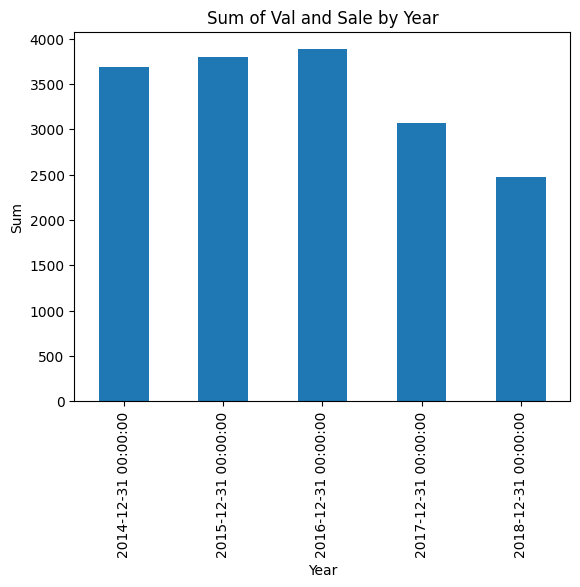

In [165]:
# Assuming you have a DataFrame named df
grouped_data = df.groupby(pd.Grouper(key='Date', freq='Y'))['Sale'].apply(sum)

# Plotting the bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Sum')
plt.title('Sum of Val and Sale by Year')
plt.show()



In [178]:
df.groupby(pd.Grouper(key='Date',freq='Y'))['Val','Sale'].apply(sum).to_clipboard(sep=' ')

<ipython-input-178-223a1f169a77>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(pd.Grouper(key='Date',freq='Y'))['Val','Sale'].apply(sum).to_clipboard(sep=' ')


PyperclipException: ignored

# `agg(regate)`

In [180]:
from IPython.display import Image

In [181]:
Image(filename='groupby-agg.png') 

FileNotFoundError: ignored

In [190]:
# agg(regation)
df.groupby('Sales Rep').agg({    'Order Id':'size'})

,Order Id
Sales Rep,
Aaron Hendrickson,292
Adam Sawyer,324
Adele Kimmel,115
Adrian Daugherty,369
Adrianna Shelton,37
...,...
Willie Lin,44
Willie Rau,95
Willie Sanchez,309


In [191]:

df.groupby('Sales Rep').agg({'Val':['sum','mean']})

Val             
                       sum         mean
Sales Rep                              
Aaron Hendrickson  1550608  5310.301370
Adam Sawyer        1587828  4900.703704
Adele Kimmel        527339  4585.556522
Adrian Daugherty   1841274  4989.902439
Adrianna Shelton    186651  5044.621622
...                    ...          ...
Willie Lin          254128  5775.636364
Willie Rau          434918  4578.084211
Willie Sanchez     1525229  4936.016181
Yvonne Jones        416388  5626.864865
Yvonne Lindsey      324334  4840.805970

[499 rows x 2 columns]

In [192]:
# agg(regation)
df.groupby('Sales Rep').agg({'Sale':['sum','mean']})

Sale          
                   sum      mean
Sales Rep                       
Aaron Hendrickson   46  0.157534
Adam Sawyer         48  0.148148
Adele Kimmel        20  0.173913
Adrian Daugherty    51  0.138211
Adrianna Shelton     8  0.216216
...                ...       ...
Willie Lin           6  0.136364
Willie Rau          19  0.200000
Willie Sanchez      52  0.168285
Yvonne Jones        12  0.162162
Yvonne Lindsey      18  0.268657

[499 rows x 2 columns]

In [185]:
# agg(regation)
df.groupby('Sales Rep').agg({    'Order Id':'size',    'Val':['sum','mean'],    'Sale':['sum','mean']})

Order Id      Val              Sale          
                      size      sum         mean  sum      mean
Sales Rep                                                      
Aaron Hendrickson      292  1550608  5310.301370   46  0.157534
Adam Sawyer            324  1587828  4900.703704   48  0.148148
Adele Kimmel           115   527339  4585.556522   20  0.173913
Adrian Daugherty       369  1841274  4989.902439   51  0.138211
Adrianna Shelton        37   186651  5044.621622    8  0.216216
...                    ...      ...          ...  ...       ...
Willie Lin              44   254128  5775.636364    6  0.136364
Willie Rau              95   434918  4578.084211   19  0.200000
Willie Sanchez         309  1525229  4936.016181   52  0.168285
Yvonne Jones            74   416388  5626.864865   12  0.162162
Yvonne Lindsey          67   324334  4840.805970   18  0.268657

[499 rows x 5 columns]

In [186]:
df

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ
...,...,...,...,...,...,...,...,...
99995,HKZFX556ZQRZJZWR,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-11-06,7516,0,Ida Woodward,LF3CPWWZKSNB1AXI
99996,962CSDMAJ49E0CRK,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2018-08-02,442,1,Ida Woodward,LF3CPWWZKSNB1AXI
99997,ZW7RO9TLL6EVVJEC,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2014-11-02,8544,0,Ida Woodward,LF3CPWWZKSNB1AXI
99998,LNKGIWMZ9RT49IE9,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-04-01,6650,0,Ida Woodward,LF3CPWWZKSNB1AXI


In [187]:
def cr(x):
    return round(np.mean(x),2)
aggregation = {    'Potential Sales':('Val','size'),    'Sales':('Sale','sum'),    'Conversion Rate':('Sale',cr)}
df.groupby('Sales Rep').agg(**aggregation)

,Potential Sales,Sales,Conversion Rate
Sales Rep,,,
Aaron Hendrickson,292,46,0.16
Adam Sawyer,324,48,0.15
Adele Kimmel,115,20,0.17
Adrian Daugherty,369,51,0.14
Adrianna Shelton,37,8,0.22
...,...,...,...
Willie Lin,44,6,0.14
Willie Rau,95,19,0.20
Willie Sanchez,309,52,0.17


In [193]:
def cr(x):
    return round(np.mean(x),2)
_ = df.groupby('Sales Rep').agg({    'Val':'size',    'Sale':['sum',cr]})
_.columns = ['Potential Sales','Sales','Conversion Rate']
_

,Potential Sales,Sales,Conversion Rate
Sales Rep,,,
Aaron Hendrickson,292,46,0.16
Adam Sawyer,324,48,0.15
Adele Kimmel,115,20,0.17
Adrian Daugherty,369,51,0.14
Adrianna Shelton,37,8,0.22
...,...,...,...
Willie Lin,44,6,0.14
Willie Rau,95,19,0.20
Willie Sanchez,309,52,0.17


## Transform

In [ ]:
Image(filename='groupby-transform.png') 

In [194]:
df.groupby('Sales Rep')['Val'].transform(lambda x: x/sum(x))

0        0.004991
1        0.005693
2        0.003976
3        0.000799
4        0.003300
           ...   
99995    0.012088
99996    0.000711
99997    0.013741
99998    0.010695
99999    0.001533
Name: Val, Length: 100000, dtype: float64

In [198]:
df['%'] = df.groupby('Sales Rep')['Val'].transform(  lambda x: x/sum(x))

In [199]:
df['%'] 

0        0.004991
1        0.005693
2        0.003976
3        0.000799
4        0.003300
           ...   
99995    0.012088
99996    0.000711
99997    0.013741
99998    0.010695
99999    0.001533
Name: %, Length: 100000, dtype: float64

In [200]:
del df['%']

In [201]:
# filter (at least 200k in sales)
df.groupby('Sales Rep').filter(lambda x: (x['Val'] * x['Sale']).sum() > 200000)#here x is df

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ
...,...,...,...,...,...,...,...,...
99129,GVRNNUAPFE0IUBHW,BLURX3WQK51RI6P7,Baptismal Tensions,2014-01-11,2677,0,Richard Dugas,Y43HS5H6PAP34ER5
99130,GX4S2LXPU3VZOS4Z,BLURX3WQK51RI6P7,Baptismal Tensions,2018-05-12,6877,0,Richard Dugas,Y43HS5H6PAP34ER5
99131,FU4ELGDQEGSGOHFZ,BLURX3WQK51RI6P7,Baptismal Tensions,2014-10-16,9189,0,Richard Dugas,Y43HS5H6PAP34ER5
99132,S553MU5UDAUID8TG,BLURX3WQK51RI6P7,Baptismal Tensions,2016-05-01,2013,0,Richard Dugas,Y43HS5H6PAP34ER5


In [203]:
# Let's add this for verification
df['cr'] = df.groupby('Sales Rep')['Sale'].transform('mean')
df['cr']

0        0.202128
1        0.202128
2        0.202128
3        0.202128
4        0.202128
           ...   
99995    0.211382
99996    0.211382
99997    0.211382
99998    0.211382
99999    0.211382
Name: cr, Length: 100000, dtype: float64

In [204]:
df.groupby('Sales Rep').filter(lambda x: x['Sale'].mean() > .3)

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id,cr
3897,4MWBSVADRWSNLBA0,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2014-03-17,2637,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3898,8C13U50FF5ZKU1TJ,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2015-10-26,9495,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3899,D6Y3HVKNT480ADL1,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2017-12-09,9156,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3900,JXO5XMLWEDZKLGCG,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2016-07-05,1219,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3901,37PVLZLXMXRCZLNK,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2018-03-07,4374,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
...,...,...,...,...,...,...,...,...,...
94627,H72B7571AMUFAH2A,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2015-08-07,2764,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348
94628,SFQVIH3PNXVLR7PM,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2014-11-28,1008,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348
94629,B4GFG6BPT1HOHJOU,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2018-06-27,8999,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348
94630,7ZO3XQ1C3U3BOM6T,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2015-02-19,2079,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348


In [205]:
del df['cr']